# Telco Churn Project

Ryvyn Young   
Codeup Data Science Team   
9/23/2020

# Planning
## Project Description: Why are our customers churning?

#### GOALS:
Find drivers for customer churn.
Construct a ML classification model that accurately predicts customer churn.
Create modules that make your process repeateable.
Document your process well enough to be presented or read like a report.

##### Audience:   
Codeup Data Science Team

##### Setting:   
Virtual 5 minute walk through of Documented Jupyter Notebook

##### Brainstorm:  
key highlights, key visualizations, prototype

#### MVP Questions to answer
Are there clear groupings where a customer is more likely to churn?
Are there features that indicate a higher propensity to churn?
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?

# Acquire

In [1]:
# import libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import get_telco_data
from prepare import prep_telco

In [2]:
# run function to get data using acquire.py and verify data shape
telco = get_telco_data()
telco.shape

(7043, 24)

summarize data (.info(), .describe(), .value_counts(), ...)

In [3]:
# Summarize Data
print(telco.info())
print(telco.describe().T, "\n")
print(telco.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

NOTES:   
total charges needs to be a float   
gender, partner, and dependents are objects, will need to get dummies
get dummies for "extra_services" as well: multiple_lines, online_security, online_backup, device_protection,
tech_support, streaming_tv, streaming_movies, paperless_billing    
last 3 columns are same as first 3 but with text description instead of numeric, drop   
check for null values and duplicates   
additional required column for tenure in years must be added   
additional column for sum of "extra services" is needed

NOTE:   
no null values found   
no duplicates found, but keeping drop duplicates line in prep file for future use   

In [4]:
# these 2 changes must be made in order for visualizations to work
# so ther are made here and not in prep file

# convert total charges to float type
# using .astype did not work, so found this method which will fill cells with errors with a null value
telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

# 11 values in total charges are now null, dropping these rows will have minimal impact
# so drop rows with null values
telco = telco.dropna(axis=0)

plot distributions of individual variables

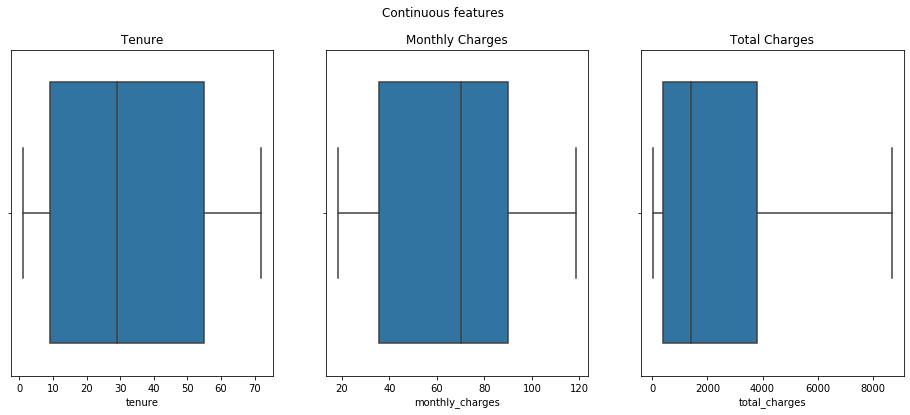

In [5]:
# use seaborn boxplot to visualize distribution of continuous features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Continuous features')

plt.subplot(131)
sns.boxplot(telco.tenure)
plt.title('Tenure')

plt.subplot(132)
sns.boxplot(telco.monthly_charges)
plt.title('Monthly Charges')

plt.subplot(133)
sns.boxplot(telco.total_charges)
plt.title('Total Charges')

plt.show()

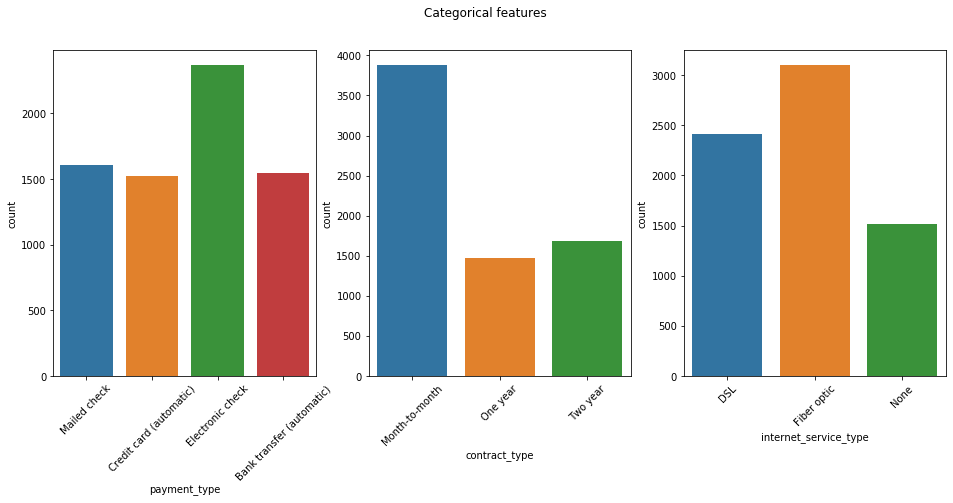

In [6]:
# use Seaborn count plot to visualize distribution of categorical features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Categorical features')

plt.subplot(131)
sns.countplot(telco.payment_type)
plt.xticks(rotation=45)

plt.subplot(132)
sns.countplot(telco.contract_type)
plt.xticks(rotation=45)

plt.subplot(133)
sns.countplot(telco.internet_service_type)
plt.xticks(rotation=45)

plt.show()

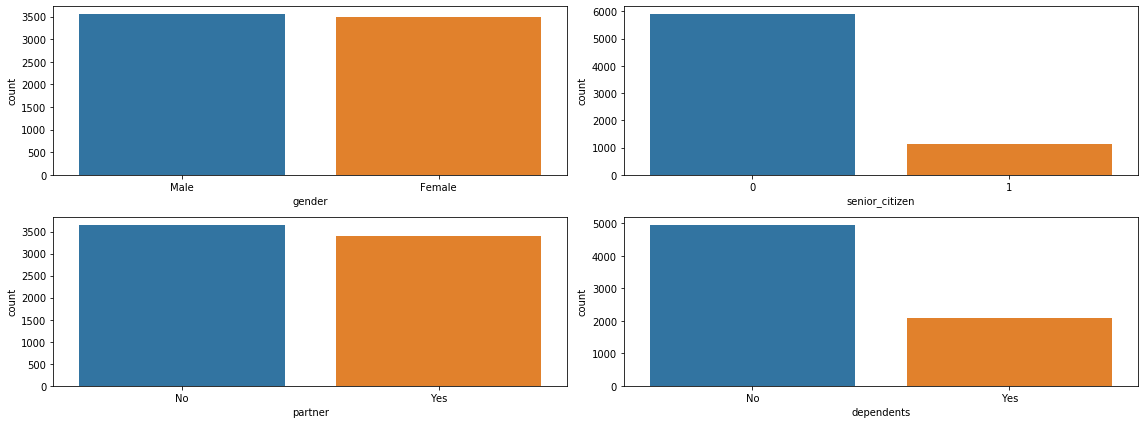

In [7]:
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(221)
sns.countplot(telco.gender)

plt.subplot(222)
sns.countplot(telco.senior_citizen)

plt.subplot(223)
sns.countplot(telco.partner)

plt.subplot(224)
sns.countplot(telco.dependents)

plt.tight_layout()
plt.show()

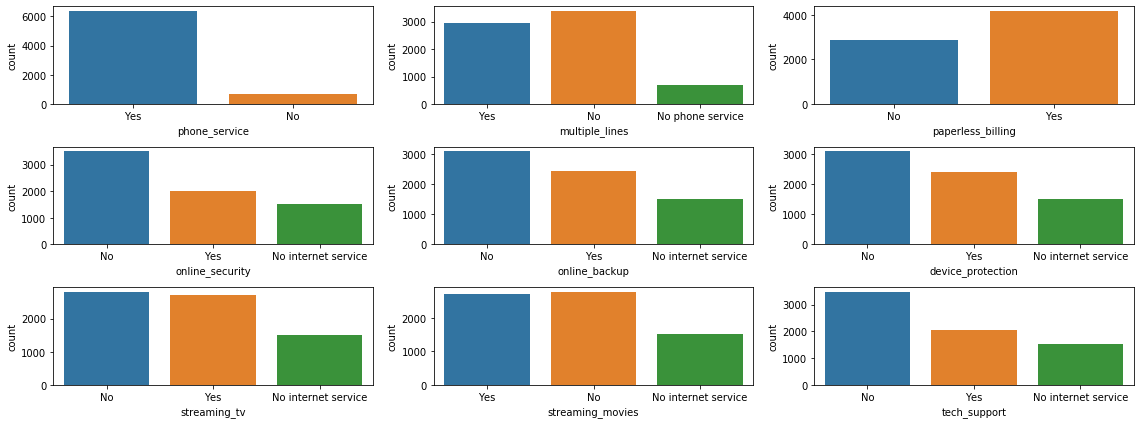

In [8]:
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(331)
sns.countplot(telco.phone_service)

plt.subplot(332)
sns.countplot(telco.multiple_lines)

plt.subplot(333)
sns.countplot(telco.paperless_billing)

plt.subplot(334)
sns.countplot(telco.online_security)

plt.subplot(335)
sns.countplot(telco.online_backup)

plt.subplot(336)
sns.countplot(telco.device_protection)

plt.subplot(337)
sns.countplot(telco.streaming_tv)

plt.subplot(338)
sns.countplot(telco.streaming_movies)

plt.subplot(339)
sns.countplot(telco.tech_support)

plt.tight_layout()
plt.show()

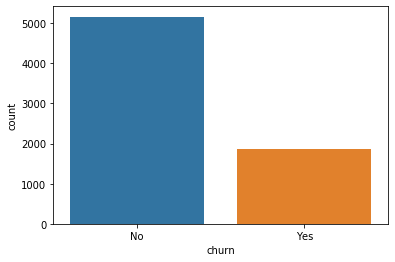

In [9]:
# distribution of target variable, churn, using seaborn
sns.countplot(telco.churn)
plt.show()

# Prepare

In [11]:
# prep file not working, need to debug -- had to add drop customer_id won't model
# run function to prepare data using prepare.py and verify train, validate, and test shape
train, validate, test = prep_telco(telco)
print(train.shape, validate.shape, test.shape)

(3937, 22) (1688, 22) (1407, 22)


#### Now that dummies are in place here is reminder of what values mean   

For yes/no: 0=NO, 1=YES   

Payment Types   
1	Electronic check   
2	Mailed check   
3	Bank transfer (automatic)   
4	Credit card (automatic)

Contract Types   
1	Month-to-month   
2	One year   
3	Two year   

Internet Service Types   
1	DSL   
2	Fiber optic   
3	None   

In [35]:
train.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'months_tenure', 'monthly_charges', 'total_charges',
       'years_tenure', 'churn', 'mult_lines', 'online_sec', 'online_backup',
       'device_protect', 'paperless', 'stream_movies', 'stream_tv', 'tech',
       'phone', 'dependents', 'partner', 'Male', 'extra_serv'],
      dtype='object')

# Explore

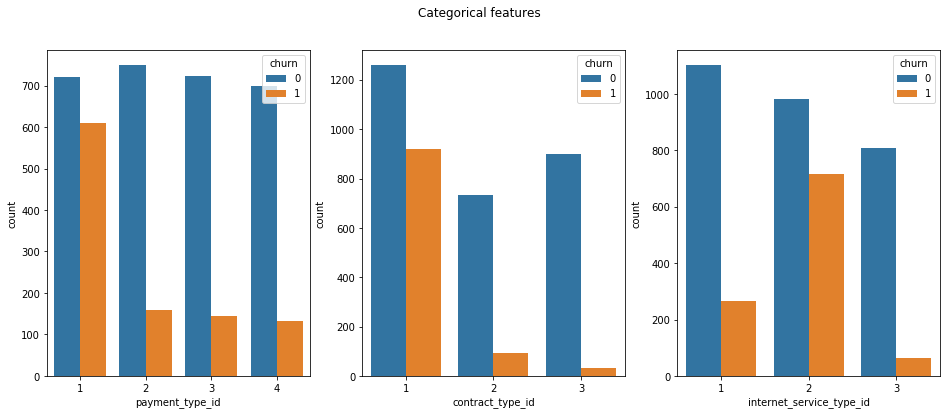

In [40]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Categorical features')

plt.subplot(131)
sns.countplot(x=train.payment_type_id, hue=train.churn)

plt.subplot(132)
sns.countplot(x=train.contract_type_id, hue=train.churn)

plt.subplot(133)
sns.countplot(x=train.internet_service_type_id, hue=train.churn)

plt.show()

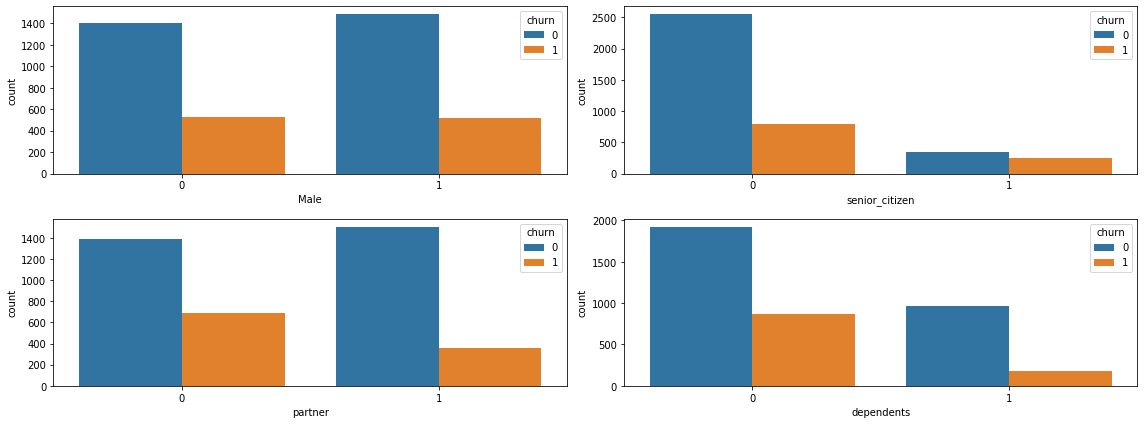

In [41]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(221)
sns.countplot(x=train.Male, hue=train.churn)

plt.subplot(222)
sns.countplot(x=train.senior_citizen, hue=train.churn)

plt.subplot(223)
sns.countplot(x=train.partner, hue=train.churn)

plt.subplot(224)
sns.countplot(x=train.dependents, hue=train.churn)

plt.tight_layout()
plt.show()

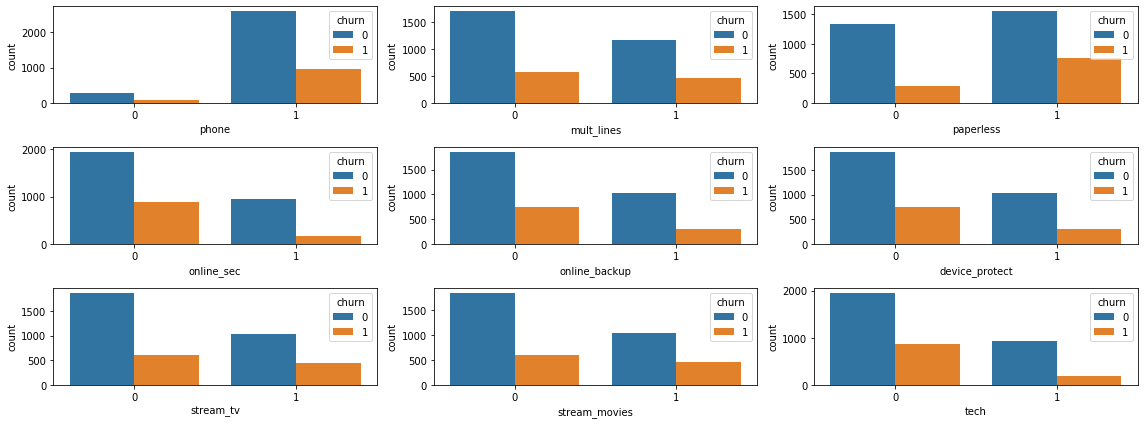

In [42]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(331)
sns.countplot(train.phone, hue=train.churn)

plt.subplot(332)
sns.countplot(train.mult_lines, hue=train.churn)

plt.subplot(333)
sns.countplot(train.paperless, hue=train.churn)

plt.subplot(334)
sns.countplot(train.online_sec, hue=train.churn)

plt.subplot(335)
sns.countplot(train.online_backup, hue=train.churn)

plt.subplot(336)
sns.countplot(train.device_protect, hue=train.churn)

plt.subplot(337)
sns.countplot(train.stream_tv, hue=train.churn)

plt.subplot(338)
sns.countplot(train.stream_movies, hue=train.churn)

plt.subplot(339)
sns.countplot(train.tech, hue=train.churn)

plt.tight_layout()
plt.show()

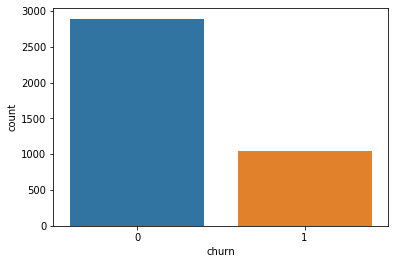

In [37]:
# distribution of target variable, churn, using seaborn on train data
sns.countplot(train.churn)
plt.show()

only noticable high churn areas that seem odd and may indicate further investigation are:   
electronic payment, m2m, fiber optic

notable low churn = those with dependents have very low churn

# Modeling Stage

## Baseline

In [13]:
# Find baseline to beat
train.churn.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn, dtype: float64

In [14]:
# Highest response is not chruned, if predicted not, would be correct 73% of the time

## Train Model 1
Decission Tree with all features, max depth of 10

In [19]:
# Decission Tree
clf = DecisionTreeClassifier(max_depth=10, random_state=123)

In [68]:
X_train = train.drop(['churn'],axis=1)
y_train = train[['churn']]

X_train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,months_tenure,monthly_charges,total_charges,years_tenure,mult_lines,online_sec,...,device_protect,paperless,stream_movies,stream_tv,tech,phone,dependents,partner,Male,extra_serv
6191,2,3,2,0,3,20.25,71.20,0.250000,0,0,...,0,0,0,0,0,1,0,0,0,0
1850,4,1,3,0,66,89.90,5958.85,5.500000,1,1,...,1,0,1,1,1,1,1,1,0,7
5438,3,2,3,0,72,114.55,8306.05,6.000000,1,1,...,1,0,1,1,1,1,1,1,1,7
2171,2,1,3,0,71,71.10,5224.95,5.916667,1,1,...,1,0,0,0,1,1,1,1,0,5
6458,3,3,3,0,62,20.00,1250.10,5.166667,0,0,...,0,0,0,0,0,1,1,0,1,0


In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [22]:
clf.score(X_train, y_train)

0.8803657607315215

## Train Model 2
Random Forest with all features, min leaf of 5, max depth of 15, 100 estimators

In [46]:
# Random Forest
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [48]:
rf.score(X_train, y_train)

0.8658877317754635

## Train Model 3
Logistic Regression with all features, using default hyperparameters

In [49]:
logit = LogisticRegression()

In [50]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logit.score(X_train, y_train)

0.8034036068072136

In [53]:
print('Coefficient: \n', logit.coef_)
print(X_train.columns)

Coefficient: 
 [[-1.70851730e-01 -1.90412017e-01 -6.48364070e-01  2.52920075e-01
  -3.14056308e-02  3.15223477e-02  3.98079938e-05 -2.61713590e-03
   1.11242482e-01 -3.39174988e-01 -2.80901140e-02 -6.87826984e-02
   3.34902885e-01  7.11647211e-02  3.77521755e-02 -2.62759953e-01
  -3.26173320e-01 -2.19383827e-01 -5.60136208e-02 -5.18011501e-02
  -1.43745490e-01]]
Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'months_tenure', 'monthly_charges', 'total_charges',
       'years_tenure', 'mult_lines', 'online_sec', 'online_backup',
       'device_protect', 'paperless', 'stream_movies', 'stream_tv', 'tech',
       'phone', 'dependents', 'partner', 'Male', 'extra_serv'],
      dtype='object')


In [59]:
# see columns and coef sorted by value
pd.Series(dict(zip(X_train.columns, logit.coef_[0]))).sort_values()

contract_type_id           -0.648364
online_sec                 -0.339175
phone                      -0.326173
tech                       -0.262760
dependents                 -0.219384
internet_service_type_id   -0.190412
payment_type_id            -0.170852
extra_serv                 -0.143745
device_protect             -0.068783
partner                    -0.056014
Male                       -0.051801
months_tenure              -0.031406
online_backup              -0.028090
years_tenure               -0.002617
total_charges               0.000040
monthly_charges             0.031522
stream_tv                   0.037752
stream_movies               0.071165
mult_lines                  0.111242
senior_citizen              0.252920
paperless                   0.334903
dtype: float64

## Train Model 4
KNN with all features, K value 5

In [60]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
knn.score(X_train, y_train)

0.8348996697993396

#### Train Models Summary
###### Accuracy Score

Model 1 Decission Tree = 88%   
Model 2 Random Forest = 87%   
Model 3 Logistic Regression = 80%   
Model 4 K Nearest Neighbors = 83%   

###### Based on this will run Model 1 and Model 2 on validate dataset

## Validate Model 1

In [64]:
clfv = DecisionTreeClassifier(max_depth=10, random_state=123)

In [79]:
X_validate = validate.drop(['churn'],axis=1)
y_validate = validate[['churn']]

X_validate.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,months_tenure,monthly_charges,total_charges,years_tenure,mult_lines,online_sec,...,device_protect,paperless,stream_movies,stream_tv,tech,phone,dependents,partner,Male,extra_serv
879,3,1,1,0,10,62.25,612.95,0.833333,0,1,...,0,0,0,1,1,1,0,0,1,3
1513,2,1,2,0,10,64.90,685.55,0.833333,0,0,...,0,0,1,0,1,1,0,0,0,3
5228,4,2,3,0,67,94.10,6302.80,5.583333,1,0,...,0,0,0,1,1,1,1,1,0,4
3204,1,2,1,1,17,101.80,1752.45,1.416667,0,0,...,1,1,1,1,0,1,0,0,1,5
5415,3,2,3,0,68,89.95,5974.30,5.666667,1,0,...,1,1,0,1,0,1,0,1,0,4


In [67]:
clfv.fit(X_validate, y_validate)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [70]:
clf.score(X_validate, y_validate)

0.7511848341232228

## Validate Model 2

In [71]:
rfv = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [72]:
rfv.fit(X_validate, y_validate)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [73]:
rfv.score(X_validate, y_validate)

0.8803317535545023

#### Validate Models Summary
###### Accuracy Score

Model 1 Decission Tree = 75% - this is a significant drop from 88% on the train dataset   
Model 2 Random Forest = 88%   

###### Based on this will run Model 2 only on test dataset

## Test Model

In [74]:
rft = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [78]:
X_test = test.drop(['churn'],axis=1)
y_test = test[['churn']]

X_test.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,months_tenure,monthly_charges,total_charges,years_tenure,mult_lines,online_sec,...,device_protect,paperless,stream_movies,stream_tv,tech,phone,dependents,partner,Male,extra_serv
3374,3,2,1,0,60,74.35,4453.30,5.000000,1,0,...,0,0,0,0,0,1,1,1,1,1
6498,4,3,3,0,70,20.05,1360.25,5.833333,0,0,...,0,0,0,0,0,1,1,1,1,0
6366,3,3,2,0,17,19.90,329.75,1.416667,0,0,...,0,0,0,0,0,1,1,1,1,0
5666,4,3,1,0,1,20.75,20.75,0.083333,0,0,...,0,0,0,0,0,1,0,0,1,0
1253,4,1,2,0,18,54.40,957.10,1.500000,0,0,...,1,1,0,0,1,1,1,1,0,3


In [80]:
rft.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [81]:
rft.score(X_test, y_test)

0.8727789623312011

#### Test Model Summary
###### Accuracy Score
  
Model 2 Random Forest = 88%   

###### Model 2 shows a consisent accuracy prediction between 87%-88% on all datasets.
###### This is also a significant improvement from the 73% baseline accuracy.

# Delivery Stage

### Model performance Summary
Model 2 Random Forest with 5 min leaf samples and a max depth of 15 preforms the best on all datasets and does not appear to be overfit on any of them. Accuracy for this model is between 87% and 88% on all datasets.